# VGG16 Model

VGG16 is a pretrained model used in imagenet. Using a pretrained model we have to use the same network architecture as the orginal paper/model
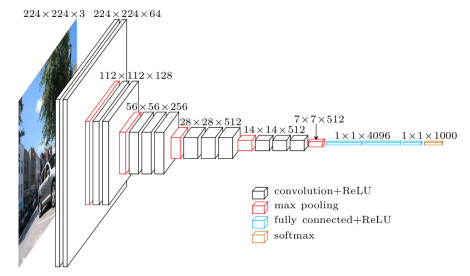

The model is exposed by a class wrapped around keras functions. 





In [1]:
#from utils.py import plots
import numpy as np

from vgg16 import VGG_16
from utils import plots

Using Theano backend.
WARNING (theano.sandbox.cuda): The cuda backend is deprecated and will be removed in the next release (v0.10).  Please switch to the gpuarray backend. You can get more information about how to switch at this URL:
 https://github.com/Theano/Theano/wiki/Converting-to-the-new-gpu-back-end%28gpuarray%29

Using gpu device 0: GeForce GTX 770 (CNMeM is disabled, cuDNN 5110)


In [2]:
%matplotlib inline

In [3]:
epochs_training = 3
dir_data = './data/dogscats/sample/'
fname_submission = './data/dogscats/submission.csv'


model = VGG_16(dir_data, batch_size=24)

./data/dogscats/sample/train
Found 145 images belonging to 2 classes.
./data/dogscats/sample/valid
Found 8 images belonging to 2 classes.
./data/dogscats/sample/test
Found 13 images belonging to 1 classes.


In [4]:
model.fit(nb_epoch=epochs_training)

Epoch 1/3
145/145 [==============================] - 6s - loss: 0.6252 - acc: 0.8069 - val_loss: 0.4958 - val_acc: 0.8750
Epoch 2/3
145/145 [==============================] - 6s - loss: 0.1000 - acc: 0.9724 - val_loss: 0.3575 - val_acc: 0.8750
Epoch 3/3
145/145 [==============================] - 6s - loss: 0.0783 - acc: 0.9655 - val_loss: 0.6692 - val_acc: 0.8750


(imgs, labels) = next(model.gen_train)

n = 4
imgs = imgs[:4]
labels = labels[:4]
plots(imgs, titles=labels) #Use utily.py plot function for ease


print(model.predict(imgs))


In [6]:
model.classes

['cats', 'dogs']

In [8]:
pred = model.model.predict_generator(model.gen_valid, model.gen_valid.nb_sample)

In [13]:
pred = pred[:,1] #Get probality it is dog
pred = np.round(pred)

pred[:10]

array([ 0.,  1.,  0.,  0.,  1.,  1.,  0.,  0.], dtype=float32)

In [12]:
labels = model.gen_valid.classes
labels[:10]

array([0, 0, 0, 0, 1, 1, 1, 1], dtype=int32)

In [6]:
model.test()

In [7]:
preds = model.test_preds
preds[:5]


array([[  3.6182e-15,   1.0000e+00],
       [  4.5014e-17,   1.0000e+00],
       [  6.5548e-17,   1.0000e+00],
       [  1.0554e-15,   1.0000e+00],
       [  1.0000e+00,   4.4223e-29]], dtype=float32)

In [8]:
isdog = preds[:,1]
isdog = isdog.clip(min=0.05, max=0.95)
isdog[:5]

array([ 0.95,  0.95,  0.95,  0.95,  0.05], dtype=float32)

In [9]:
fnames = np.array(model.gen_test.filenames)
ids = np.array([int(f[8:f.find('.')]) for f in fnames])


In [10]:
subm = np.stack([ids,isdog], axis=1)
subm[:5]

array([[ 1.  ,  0.95],
       [ 2.  ,  0.95],
       [ 3.  ,  0.95],
       [ 4.  ,  0.95],
       [ 5.  ,  0.05]])

In [11]:
np.savetxt(fname_submission, subm, fmt='%d,%.5f', header='id,label', comments='')

imgs = next(batches_test)

n = 4
imgs = imgs[:4]
labels = labels[:4]
plots(imgs, titles=labels) #Use utily.py plot function for ease


print(model.predict(imgs))
